In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from pathlib import Path
from skimage import io
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Activation, Dropout
from keras.optimizers import RMSprop


In [2]:
def vectorize (directory, label):
    
    """
    vectorizes images in a directory and assigns label to them
 
    Args:
        directory (str): the directory path
        label (int): the class label of the images in that directory
 
    Returns:
        list: a list of vectors of the images in the directory
    """
    
    image_vectors = []
    # iterate over files in that directory
    file_names = Path(directory).glob('*')   #returns the name of each file
    for file_name in file_names:
        image_vector = io.imread(str(file_name))
        image_vectors.append((image_vector, label))
    
    return image_vectors

In [3]:
mp= vectorize ('Data folders/augmented_mp', 1)

print(len(mp))
print(mp[0][1])
print(mp[0][0][0])

2357
1
[[253 235 213]
 [254 236 214]
 [255 236 215]
 [255 235 215]
 [255 234 215]
 [255 232 214]
 [255 229 210]
 [255 228 209]
 [255 224 205]
 [255 223 204]
 [255 223 203]
 [255 223 202]
 [254 222 199]
 [252 224 200]
 [253 225 201]
 [252 228 202]
 [255 232 206]
 [255 234 207]
 [255 235 208]
 [255 236 209]
 [255 236 209]
 [255 234 207]
 [255 232 206]
 [255 231 205]
 [253 229 203]
 [253 229 203]
 [254 228 203]
 [255 229 204]
 [255 230 205]
 [255 232 207]
 [255 234 209]
 [255 236 210]
 [255 236 210]
 [255 237 210]
 [255 238 211]
 [255 238 211]
 [255 239 211]
 [255 241 212]
 [255 240 214]
 [253 242 214]
 [254 242 216]
 [251 244 216]
 [252 245 217]
 [253 248 219]
 [254 250 223]
 [253 249 222]
 [248 247 219]
 [248 243 214]
 [246 232 206]
 [249 232 206]
 [251 234 208]
 [253 236 210]
 [255 239 213]
 [255 242 216]
 [255 245 219]
 [255 247 221]
 [255 248 221]
 [255 246 219]
 [255 242 215]
 [253 239 212]
 [250 236 209]
 [248 234 207]
 [245 234 206]
 [247 233 206]
 [253 231 208]
 [255 233 210]
 [2

In [4]:
cp= vectorize('Data folders/augmented_cp', 0)

In [5]:
ms= vectorize('Data folders/augmented_ms', 0)

In [6]:
skin_lesions= mp + cp + ms
len(skin_lesions)

4895

In [7]:
import random
random.seed(17)

random.shuffle(skin_lesions)

In [8]:
print(skin_lesions[0][0].shape, skin_lesions[13][0].shape, skin_lesions[27][0].shape)

(224, 224, 3) (224, 224, 3) (224, 224, 3)


In [9]:
y= np.array([])
    
for tuple in skin_lesions:
    unit_y= tuple[1]
    y= np.append(y, unit_y)
    
print(y[:20])

[0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1.]


In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y = to_categorical(y)  
print(type(y),'\n', y[14:20])

#tf.one_hot can also be used for one-hot encoding; 
#however, its output is a tensorflow.python.framework.ops.EagerTensor, 
#which is not an acceptable data type for train_test_split

<class 'numpy.ndarray'> 
 [[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [12]:
x= []
    
for tuple in skin_lesions:
    unit_x= tuple[0]
    x.append(unit_x)

print(len(x), type(x[0]))

4895 <class 'numpy.ndarray'>


In [13]:
for array in x:
    array= np.array(array, np.float32)/255   #normalizing the pixel values

In [14]:
x= np.array(x)

In [15]:
print(x.shape, y.shape)

(4895, 224, 224, 3) (4895, 2)


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.15, random_state=17, stratify=y)

In [18]:
print(len(x_train), len(x_test))

4160 735


## Model training and testing

In [19]:
model = Sequential()
#conv layer 1
model.add(Conv2D(filters = 8, kernel_size = (5,5), padding = 'Same', 
                 activation ='relu', input_shape = (224, 224, 3)))
model.add(MaxPool2D(pool_size=(2,2)))

#conv layer 2
model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# fully connected layers
model.add(Flatten(input_shape=(224, 224, 3)))
model.add(Dense(256))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
model.add(Activation('tanh'))
model.add(Dropout(0.2))

model.add(Dense(128))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
model.add(Activation('tanh'))
model.add(Dropout(0.2))

model.add(Dense(64))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
model.add(Activation('tanh'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='sigmoid'))

In [20]:
optimizer = RMSprop(learning_rate=0.01)

In [21]:
model.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 8)       608       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 256)               1

In [23]:
history= model.fit(x_train, y_train, epochs=30, batch_size=200) 

Epoch 1/30
21/21 [==============================] - 101s 5s/step - loss: 0.7051 - accuracy: 0.6200
Epoch 2/30
21/21 [==============================] - 87s 4s/step - loss: 0.6497 - accuracy: 0.6394
Epoch 3/30
21/21 [==============================] - 85s 4s/step - loss: 0.6403 - accuracy: 0.6464
Epoch 4/30
21/21 [==============================] - 85s 4s/step - loss: 0.6369 - accuracy: 0.6529
Epoch 5/30
21/21 [==============================] - 85s 4s/step - loss: 0.6226 - accuracy: 0.6709
Epoch 6/30
21/21 [==============================] - 84s 4s/step - loss: 0.6137 - accuracy: 0.6709
Epoch 7/30
21/21 [==============================] - 86s 4s/step - loss: 0.6044 - accuracy: 0.6796
Epoch 8/30
21/21 [==============================] - 88s 4s/step - loss: 0.5977 - accuracy: 0.6805
Epoch 9/30
21/21 [==============================] - 90s 4s/step - loss: 0.5881 - accuracy: 0.6947
Epoch 10/30
21/21 [==============================] - 92s 4s/step - loss: 0.5790 - accuracy: 0.7002
Epoch 11/30
21/21 

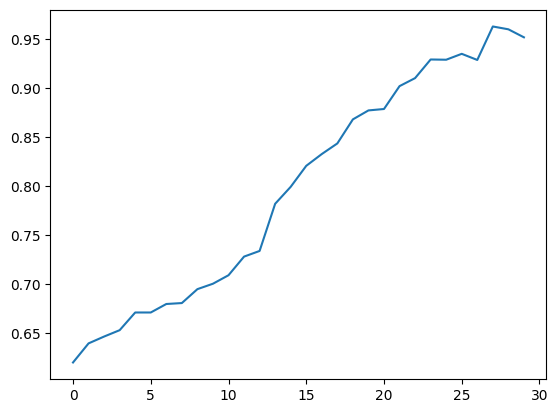

In [24]:
plt.plot(history.history["accuracy"])

In [25]:
performance = model.evaluate(x_test, y_test)

print(performance)

23/23 [==============================] - 7s 300ms/step - loss: 0.7400 - accuracy: 0.8000
[0.7399643063545227, 0.800000011920929]


In [26]:
y_pred = model.predict(x_test)

23/23 [==============================] - 5s 210ms/step


In [27]:
class_label = np.argmax(y_pred, 1)
class_label[:15]

#Returns the index with the largest value across axes of a tensor.
#for example,index 0 corresponds to one-hot encoding for non-mpox, and 1 corresponds to mpox

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [28]:
# Print preds vs true values
print("{:10} | {}".format('Rounded Model Predictions','True labels'))
for i, label in enumerate(class_label[:25]):
  print("{:25} | {}".format(label, y_test[:25][i]))

Rounded Model Predictions | True labels
                        1 | [0. 1.]
                        1 | [1. 0.]
                        0 | [1. 0.]
                        0 | [0. 1.]
                        0 | [0. 1.]
                        1 | [0. 1.]
                        1 | [1. 0.]
                        0 | [1. 0.]
                        1 | [0. 1.]
                        1 | [0. 1.]
                        1 | [0. 1.]
                        1 | [0. 1.]
                        1 | [0. 1.]
                        1 | [1. 0.]
                        1 | [1. 0.]
                        0 | [1. 0.]
                        1 | [0. 1.]
                        1 | [1. 0.]
                        1 | [0. 1.]
                        0 | [1. 0.]
                        1 | [1. 0.]
                        1 | [0. 1.]
                        1 | [0. 1.]
                        0 | [1. 0.]
                        0 | [1. 0.]


In [29]:
from sklearn.metrics import roc_auc_score

In [30]:
roc_auc_score(y_test, y_pred)

0.8717692068152498